# <u>Stock Overview for Hewlett Packard Enterprise (HPE)</u>
**by Nicole Wambui**

## Table of Contents
- <a href = "#overview">Overview</a>
- <a href = "#data-wrangling">Data Wrangling</a>
- <a href = "#exploratory-data-analysis">Exploratory Data Analysis</a>
    - <a href = "#q1">Part 1</a>
    - <a href = "#q2">Part 2</a>
    - <a href = "#q3">Part 3</a>
    - <a href = "#q4">Part 4</a>
- <a href = "#conclusion">Conclusion</a>

<a id='overview'></a>
## Overview

The purpose of this study is to get familiar with working with stock data while also getting a look at HPE's stock performance between 2016 and 2023. The dataset was obtained online, and includes daily stock prices from `10/1/2016` to `10/1/2023`. The data also includes each days' high, low, close, and adjusted close prices as well as the traded volume.

<a id='data-wrangling'></a>
## Data Wrangling

In [1]:
%%HTML
<style type='text/css'>
    table.dataframe td, table.datafram th {
        border-style: solid;
        border: 1px solid lightgrey;
    }
</style>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The first step would be inspecting it for any data integrity issues

In [8]:
df = pd.read_csv('HPE.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-11,7.805611,7.968349,7.596376,7.706806,6.360966,25998996
1,2016-01-12,7.759114,7.799799,7.608000,7.706806,6.360966,21435562
2,2016-01-13,7.759114,7.759114,7.282525,7.410390,6.116314,30489650
3,2016-01-14,7.410390,7.654497,7.352269,7.555692,6.236240,22973740
4,2016-01-15,7.323209,7.439450,7.259276,7.288337,6.015573,33945733
5,2016-01-19,7.369706,7.427826,7.090726,7.160471,5.910037,22239750
6,2016-01-20,6.974485,7.090726,6.756532,7.009357,5.785313,28630244
7,2016-01-21,6.974485,7.288337,6.869868,7.212780,5.953211,28784234
8,2016-01-22,7.381330,7.805611,7.352269,7.759114,6.404139,26272736
9,2016-01-25,7.724242,7.875356,7.625437,7.753302,6.399342,19241679


In [9]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1752,2022-12-23,15.720000,15.775000,15.490000,15.750000,15.750000,8328800
1753,2022-12-27,15.810000,15.935000,15.745000,15.880000,15.880000,6066800
1754,2022-12-28,15.900000,15.940000,15.560000,15.570000,15.570000,6480100
1755,2022-12-29,15.670000,16.030001,15.670000,15.920000,15.920000,8469100
1756,2022-12-30,15.820000,15.960000,15.760000,15.960000,15.960000,9396400
1757,2023-01-03,16.090000,16.139999,15.830000,16.059999,16.059999,18233900
1758,2023-01-04,16.150000,16.525000,16.120001,16.420000,16.420000,15865500
1759,2023-01-05,16.290001,16.495001,16.184999,16.450001,16.450001,13099500
1760,2023-01-06,16.680000,17.209999,16.670000,17.110001,17.110001,15242100
1761,2023-01-09,17.100000,17.250000,16.889999,16.959999,16.959999,19294700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Adj Close  1762 non-null   float64
 6   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,13.837125,14.018427,13.668701,13.846771,12.412324,1.269587e+07
std,2.429166,2.429227,2.425823,2.424329,2.398943,6.791496e+06
min,6.974485,7.090726,6.756532,7.009357,5.785313,2.022600e+06
25%,12.794275,12.970636,12.631360,12.798635,11.021994,8.326175e+06
50%,14.340000,14.508685,14.185000,14.350000,12.832023,1.105905e+07
75%,15.630000,15.820000,15.468750,15.660000,14.173926,1.501145e+07
max,19.240000,19.475000,19.000000,19.410000,17.133421,8.066282e+07


**Defined data issues:**

1. `Date` column is `object` dtype.

2. `Date` column is concatenated.

3. The dataset has data from 2023.

**Coding and Testing data issues:**

1. Convert `Date`column dtype to `datetime`.

2. Create columns for `year`, `month` and `year-month` for easier calculations.

3. Remove 2023 data because it has only been a few days into the year and will skew the results

In [10]:
df_1 = df
df_1['Date'] = pd.to_datetime(df_1['Date'], format = '%Y-%m-%d')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1762 non-null   datetime64[ns]
 1   Open       1762 non-null   float64       
 2   High       1762 non-null   float64       
 3   Low        1762 non-null   float64       
 4   Close      1762 non-null   float64       
 5   Adj Close  1762 non-null   float64       
 6   Volume     1762 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.5 KB


In [11]:
df_1['Year'] = df_1['Date'].dt.year
df_1['Month'] = df_1['Date'].dt.month
df_1['Year_Month'] = df_1['Date'].dt.to_period('m')
df_1.info()
df_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1762 non-null   datetime64[ns]
 1   Open        1762 non-null   float64       
 2   High        1762 non-null   float64       
 3   Low         1762 non-null   float64       
 4   Close       1762 non-null   float64       
 5   Adj Close   1762 non-null   float64       
 6   Volume      1762 non-null   int64         
 7   Year        1762 non-null   int64         
 8   Month       1762 non-null   int64         
 9   Year_Month  1762 non-null   period[M]     
dtypes: datetime64[ns](1), float64(5), int64(3), period[M](1)
memory usage: 137.8 KB


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Year_Month
0,2016-01-11,7.805611,7.968349,7.596376,7.706806,6.360966,25998996,2016,1,2016-01
1,2016-01-12,7.759114,7.799799,7.608000,7.706806,6.360966,21435562,2016,1,2016-01
2,2016-01-13,7.759114,7.759114,7.282525,7.410390,6.116314,30489650,2016,1,2016-01
3,2016-01-14,7.410390,7.654497,7.352269,7.555692,6.236240,22973740,2016,1,2016-01
4,2016-01-15,7.323209,7.439450,7.259276,7.288337,6.015573,33945733,2016,1,2016-01
5,2016-01-19,7.369706,7.427826,7.090726,7.160471,5.910037,22239750,2016,1,2016-01
6,2016-01-20,6.974485,7.090726,6.756532,7.009357,5.785313,28630244,2016,1,2016-01
7,2016-01-21,6.974485,7.288337,6.869868,7.212780,5.953211,28784234,2016,1,2016-01
8,2016-01-22,7.381330,7.805611,7.352269,7.759114,6.404139,26272736,2016,1,2016-01
9,2016-01-25,7.724242,7.875356,7.625437,7.753302,6.399342,19241679,2016,1,2016-01


In [13]:
df_1 = df_1.query('Year < 2023')
df_1.info()
df_1.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1756
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1757 non-null   datetime64[ns]
 1   Open        1757 non-null   float64       
 2   High        1757 non-null   float64       
 3   Low         1757 non-null   float64       
 4   Close       1757 non-null   float64       
 5   Adj Close   1757 non-null   float64       
 6   Volume      1757 non-null   int64         
 7   Year        1757 non-null   int64         
 8   Month       1757 non-null   int64         
 9   Year_Month  1757 non-null   period[M]     
dtypes: datetime64[ns](1), float64(5), int64(3), period[M](1)
memory usage: 151.0 KB


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Year_Month
1747,2022-12-16,15.545,15.740000,15.435,15.64,15.64,31670500,2022,12,2022-12
1748,2022-12-19,15.700,15.770000,15.375,15.48,15.48,9138500,2022,12,2022-12
1749,2022-12-20,15.510,15.680000,15.470,15.66,15.66,13188200,2022,12,2022-12
1750,2022-12-21,15.770,15.955000,15.740,15.78,15.78,14255200,2022,12,2022-12
1751,2022-12-22,15.650,15.720000,15.440,15.71,15.71,13616800,2022,12,2022-12
1752,2022-12-23,15.720,15.775000,15.490,15.75,15.75,8328800,2022,12,2022-12
1753,2022-12-27,15.810,15.935000,15.745,15.88,15.88,6066800,2022,12,2022-12
1754,2022-12-28,15.900,15.940000,15.560,15.57,15.57,6480100,2022,12,2022-12
1755,2022-12-29,15.670,16.030001,15.670,15.92,15.92,8469100,2022,12,2022-12
1756,2022-12-30,15.820,15.960000,15.760,15.96,15.96,9396400,2022,12,2022-12


In [16]:
df_1.to_csv('HPE_1.csv')

In [3]:
df_1 = pd.read_csv("HPE_1.csv")
df_new = df_1.copy()

<a id='exploratory-data-analysis'></a>
## Exploratory Data Analysis

A few questions I'm interested in figuring out are the years with the highest stock price, lowest stock price, as well as looking at the different quarterly performances. 

<a id='q1'></a>
**1. Which years had the largest peaks and dips in stock prices?**

In [44]:
highest_stock_price = df_new.groupby('Year')['High'].mean()
print(highest_stock_price)
lowest_stock_price = df_new.groupby('Year')['Low'].mean()
print(lowest_stock_price)

Year
2016    11.278135
2017    13.926855
2018    16.345980
2019    15.351948
2020    10.922621
2021    14.978671
2022    15.242741
Name: High, dtype: float64
Year
2016    10.984797
2017    13.663665
2018    15.948183
2019    15.025155
2020    10.528715
2021    14.614270
2022    14.836004
Name: Low, dtype: float64


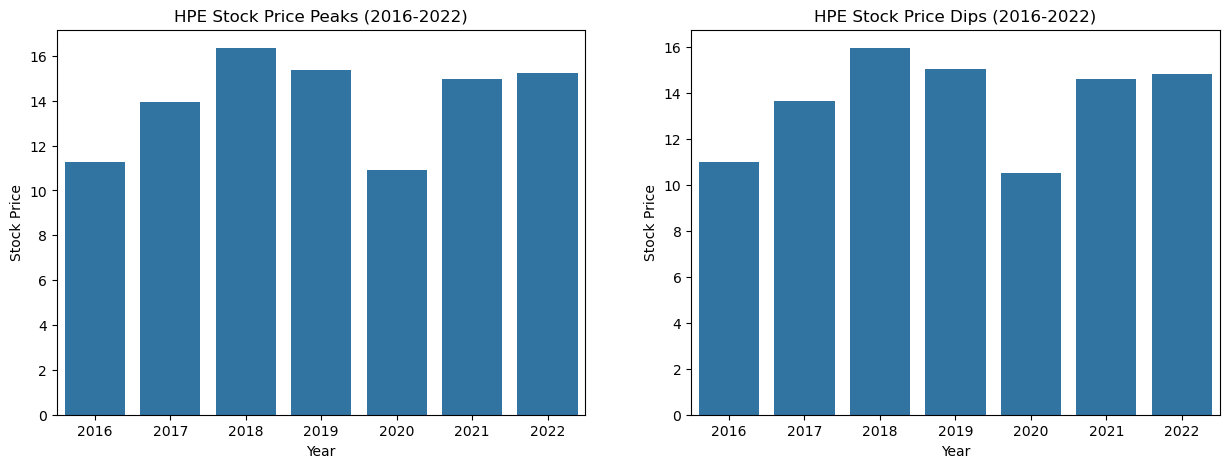

In [5]:
plt.figure(figsize = [15, 5])

plt.subplot(1,2,1)
colour = sns.color_palette(palette = None, as_cmap = True)[0]
sns.barplot(data = df_new, x = 'Year', y = 'High', color = colour, ci = None);
plt.ylabel('Stock Price')
plt.title('HPE Stock Price Peaks (2016-2022)');

plt.subplot(1,2,2)
sns.barplot(data = df_new, x = 'Year', y = 'Low', color = colour, ci = None);
plt.ylabel('Stock Price')
plt.title('HPE Stock Price Dips (2016-2022)');


> ***Observations:***
>
> - The largest stock price peaks were in 2018 with an average high of `$16.345980/share`.
>
> - The largest stock price dips were in 2020 with an average low of `$10.528715/share`.

<a id='q2'></a>
**2. What were the average daily returns for each year?**

<u>Note</u>: <br>
This will be calculated using the adjusted close values.

- The first step is creating a new column that will be populated by values representing each days return based on the open and close stock price.

In [6]:
df_new["Daily_Returns"] = ((df_new['Adj Close'])/(df_new['Adj Close'].shift(1)) - 1) * 100
df_new.info()
df_new.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1757 non-null   int64  
 1   Date           1757 non-null   object 
 2   Open           1757 non-null   float64
 3   High           1757 non-null   float64
 4   Low            1757 non-null   float64
 5   Close          1757 non-null   float64
 6   Adj Close      1757 non-null   float64
 7   Volume         1757 non-null   int64  
 8   Year           1757 non-null   int64  
 9   Month          1757 non-null   int64  
 10  Year_Month     1757 non-null   object 
 11  Daily_Returns  1756 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 164.8+ KB


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Year_Month,Daily_Returns
0,0,2016-01-11,7.805611,7.968349,7.596376,7.706806,6.360966,25998996,2016,1,2016-01,NaN
1,1,2016-01-12,7.759114,7.799799,7.608000,7.706806,6.360966,21435562,2016,1,2016-01,0.000000
2,2,2016-01-13,7.759114,7.759114,7.282525,7.410390,6.116314,30489650,2016,1,2016-01,-3.846145


In [5]:
average_yearly_returns = df_new.groupby('Year')['Daily_Returns'].mean()
print(average_yearly_returns)

Year
2016    0.254171
2017    0.044153
2018   -0.001365
2019    0.099717
2020   -0.037727
2021    0.142025
2022    0.041255
Name: Daily_Returns, dtype: float64


Text(0.5, 1.0, 'HPE Stock Average Daily Return (2016 - 2022)')

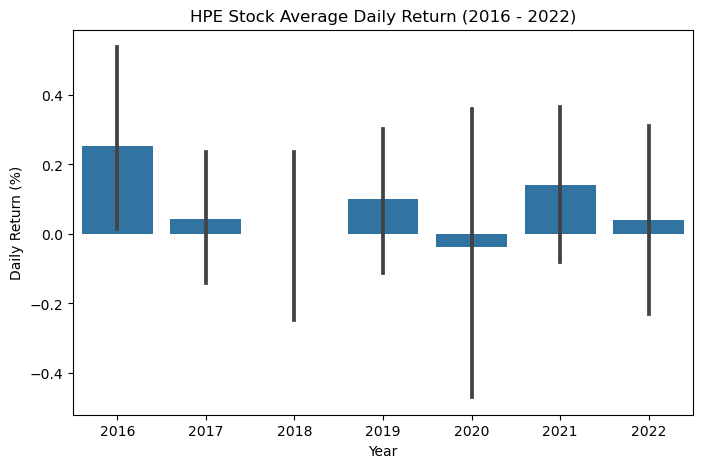

In [75]:
plt.figure(figsize = [8, 5])
sns.barplot(data = df_new, x = 'Year', y = 'Daily_Returns', color = colour);
plt.ylabel('Daily Return (%)')
plt.title('HPE Stock Average Daily Return (2016 - 2022)')

> ***Observations:***
>
> - The year with the highest daily returns was 2016, with an average daily return of `0.254171%`.
>
> - The year with the lowest daily returns was 2020, with an average daily return of `-0.037727%`.

<a id='q3'></a>
**3. What are the average returns per quarter from 2016 to 2022?**

- The first step would be creating a column that will be populated by values representing the quarter each date falls in.

In [7]:
qs = []

for x in df_new['Month']:
    if ((x == 1) | (x == 2) | (x == 3)):
        qs.append("Q1")
    elif ((x == 4) | (x == 5) | (x == 6)):
        qs.append("Q2")
    elif ((x == 7) | (x == 8) | (x == 9)):
        qs.append("Q3")
    else:
        qs.append("Q4")
df_new["Quarters"] = qs
df_new.info()
df_new.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1757 non-null   int64  
 1   Date           1757 non-null   object 
 2   Open           1757 non-null   float64
 3   High           1757 non-null   float64
 4   Low            1757 non-null   float64
 5   Close          1757 non-null   float64
 6   Adj Close      1757 non-null   float64
 7   Volume         1757 non-null   int64  
 8   Year           1757 non-null   int64  
 9   Month          1757 non-null   int64  
 10  Year_Month     1757 non-null   object 
 11  Daily_Returns  1756 non-null   float64
 12  Quarters       1757 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 178.6+ KB


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Year_Month,Daily_Returns,Quarters
0,0,2016-01-11,7.805611,7.968349,7.596376,7.706806,6.360966,25998996,2016,1,2016-01,NaN,Q1
1,1,2016-01-12,7.759114,7.799799,7.608000,7.706806,6.360966,21435562,2016,1,2016-01,0.000000,Q1
2,2,2016-01-13,7.759114,7.759114,7.282525,7.410390,6.116314,30489650,2016,1,2016-01,-3.846145,Q1


In [36]:
quarterly_returns = df_new.groupby('Quarters')['Daily_Returns'].mean()
print(quarterly_returns)

Quarters
Q1    0.170759
Q2   -0.090000
Q3    0.096266
Q4    0.133870
Name: Daily_Returns, dtype: float64


Text(0.5, 1.0, 'HPE Stock Quarterly Performance (2016 - 2020)')

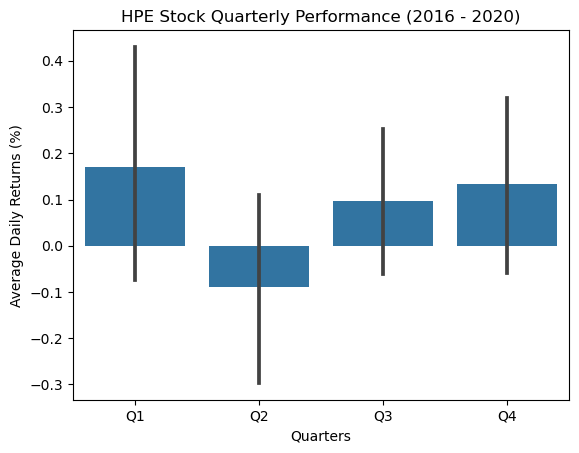

In [74]:
sns.barplot(data = df_new, x = 'Quarters', y = 'Daily_Returns', color = colour);
plt.ylabel('Average Daily Returns (%)');
plt.title('HPE Stock Quarterly Performance (2016 - 2020)')

> ***Observations:***
>
> - Quarter 1 has the highest daily returns with an average daily return of `0.170759%`.
>
> - Quarter 2 has the lowest daily returns with an average daily return of `-0.090000%`.

- We can also look at how each quarter of each year performed

In [51]:
quarterly_returns_by_year = df_new.groupby(['Year','Quarters'])['Daily_Returns'].mean()
print(quarterly_returns_by_year)

Year  Quarters
2016  Q1          0.587211
      Q2          0.076174
      Q3          0.353298
      Q4          0.043544
2017  Q1          0.055363
      Q2         -0.094153
      Q3          0.229727
      Q4         -0.014148
2018  Q1          0.359833
      Q2         -0.256672
      Q3          0.195476
      Q4         -0.288578
2019  Q1          0.279611
      Q2         -0.025972
      Q3          0.054709
      Q4          0.096990
2020  Q1         -0.658890
      Q2          0.091964
      Q3         -0.018405
      Q4          0.417040
2021  Q1          0.501000
      Q2         -0.099006
      Q3         -0.009068
      Q4          0.188233
2022  Q1          0.128337
      Q2         -0.326074
      Q3         -0.128239
      Q4          0.489238
Name: Daily_Returns, dtype: float64


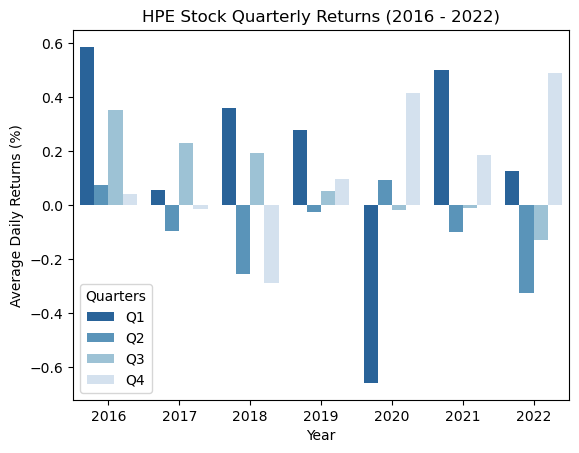

In [68]:
figsize = [8,3]
sns.barplot(data = df_new, x = 'Year', y = 'Daily_Returns', hue = 'Quarters', palette = 'Blues_r', ci = None);
plt.ylabel('Average Daily Returns (%)')
plt.title('HPE Stock Quarterly Returns (2016 - 2022)');

C:\Users\BOBO\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


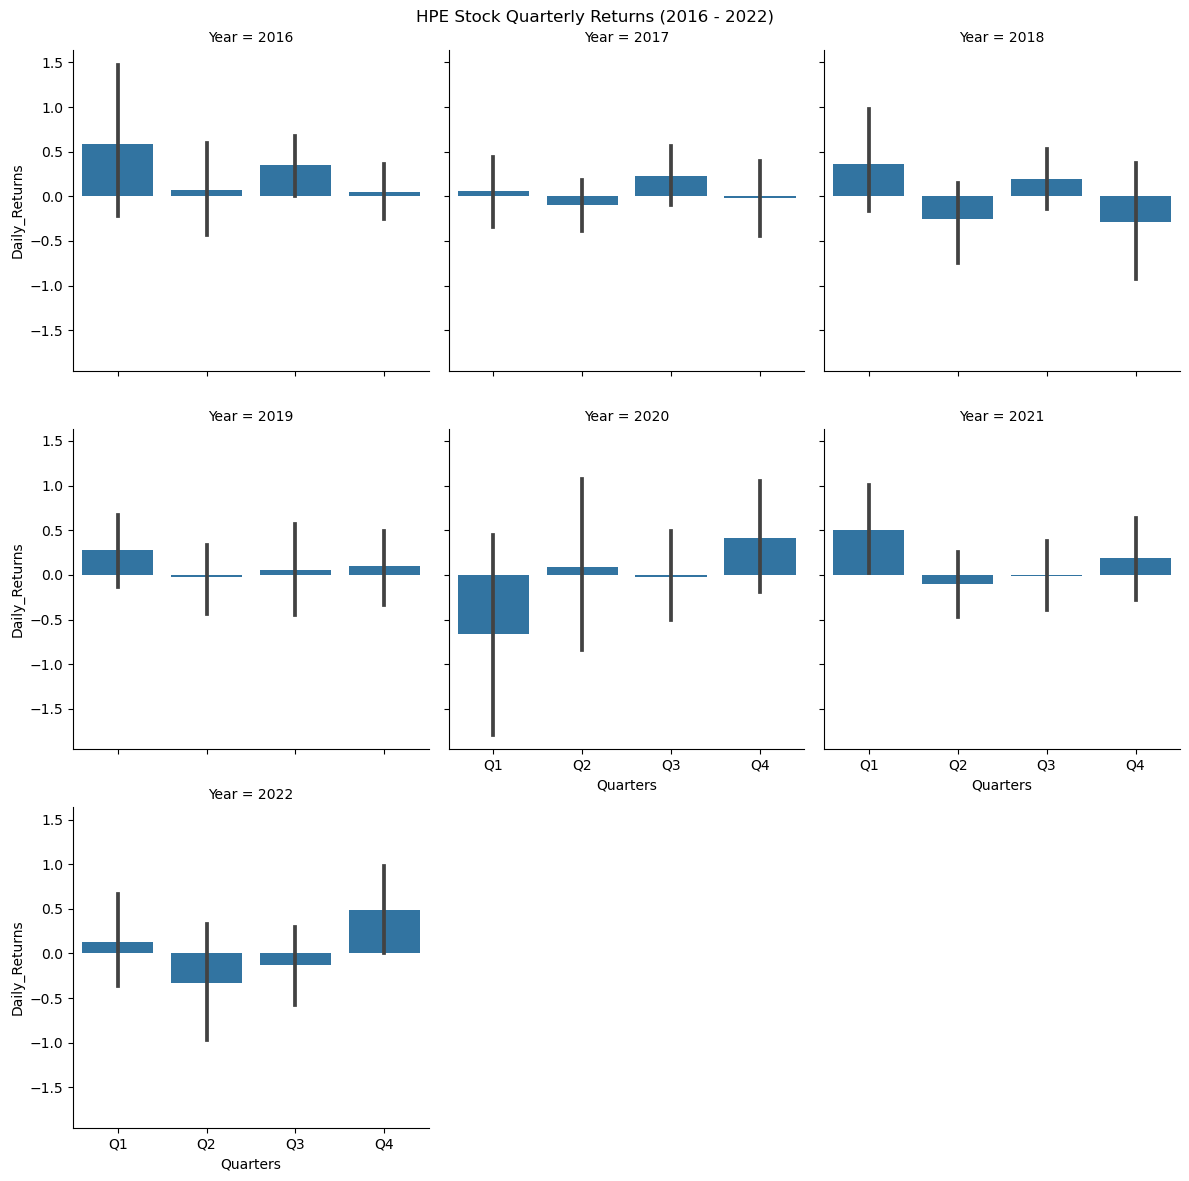

In [73]:
#plotting the quarterly returns per year
g = sns.FacetGrid(data = df_new, col = 'Year', height = 4, col_wrap = 3);
plt.suptitle('HPE Stock Quarterly Returns (2016 - 2022)');
g.map(sns.barplot, 'Quarters', 'Daily_Returns');

> ***Observations:***
>
> - Overall, Quarter 1 of 2016 was the best performing quarter with an average dialy return of `0.587211`.
>
> - Overall, Quarter 1 of 2020 was the worst performing quarter with an average dialy return of `-0.658890%`.

<a id='q4'></a>
**4. How was the HPE stock affected by the 2020 pandemic and subsequent lockdowns?**

In [63]:
y2020 = df_new.query('Year == 2020')
monthly_performance_20 = y2020.groupby('Month')['Daily_Returns'].mean()
print(monthly_performance_20)

Month
1    -0.603050
2    -0.430498
3    -0.909440
4     0.228676
5    -0.076100
6     0.114251
7     0.087932
8    -0.077411
9    -0.070798
10   -0.340818
11    1.284903
12    0.385931
Name: Daily_Returns, dtype: float64


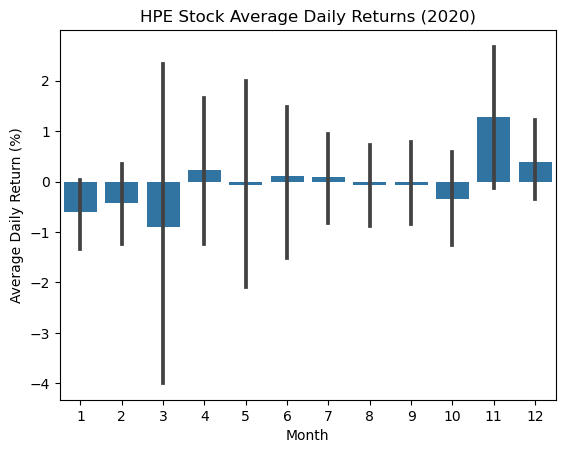

In [66]:
sns.barplot(data = y2020, x = 'Month', y = 'Daily_Returns', color = colour);
plt.ylabel('Average Daily Return (%)')
plt.title('HPE Stock Average Daily Returns (2020)');

> ***Observations:***
>
> - November had the best stock performance of the year with an average daily return of `1.284903%`.
>
> - March had the worst stock performance of the year with an average daily return of `-0.909440%`.

In [8]:
df_new.to_csv('HPE_2.csv')

<a id='discussion'></a>
## Conclusion

Overall, the HPE stock seems to be relatively stable with average yearly returns of `< 0.3%`. As expected, the stock took it's largest hit in 2020 with investors receiving average returns of `-0.037727%`. The first quarter of the year seems to be the period with the highest returns, netting average returns of `0.170759%`. Conversely, the second quarter of the year appears to yield the least amount of returns, recording average returns of `-0.090000%`.

Based on the analysis in this case study on the stock's performance, it would be recommended to invest within the second quarter and hold for a period of about 9 to 12 months in order to see good returns when investing in this stock option.